In [1]:
epochs = 5
batch_size = 16
vocabulary_size = 5000
max_sentence_lenght = 100

In [11]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [3]:
training_dataframe = pd.read_csv('./Drugs/drugsComTrain_raw.tsv', delimiter='\t')
training_dataframe.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
testing_dataframe = pd.read_csv('./Drugs/drugsComTest_raw.tsv', delimiter='\t')
testing_dataframe.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [23]:
train_samples = training_dataframe['review']
train_labels = training_dataframe['usefulCount']
#train_labels = training_dataframe['rating'].values

test_samples = testing_dataframe['review']
test_labels = testing_dataframe['usefulCount']
#test_labels = testing_dataframe['rating'].values

In [24]:
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

(161297,)
(161297,)
(53766,)
(53766,)


In [25]:
a = training_dataframe['usefulCount']

print(a.mean(), a.min(), a.max(), sep='\n')

28.00475520313459
0
1291


In [26]:
a = testing_dataframe['usefulCount']
print(a.mean(), a.min(), a.max(), sep='\n')

27.98975188781014
0
949


In [27]:
def categorize(arr):
    result = np.zeros(arr.shape)
    result[arr > 10] = 1
    result[arr > 30] = 2
    result[arr > 100] = 3
    result[arr > 500] = 4
    return result

In [29]:
%%time

train_labels = categorize(training_dataframe['usefulCount'])
test_labels = categorize(testing_dataframe['usefulCount'])

print(train_labels)
print(test_labels)

[1. 3. 1. ... 2. 2. 3.]
[1. 1. 0. ... 0. 1. 2.]
Wall time: 11 ms


In [30]:
%%time
# Build up the word index (only 5000 most common words)

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = vocabulary_size)
tokenizer.fit_on_texts(train_samples)

Wall time: 23.1 s


In [31]:
# Convert reviews to integer sequences

train_sequences = tokenizer.texts_to_sequences(train_samples)
test_sequences = tokenizer.texts_to_sequences(test_samples)

In [32]:
tokenizer.word_index

{'i': 1,
 'and': 2,
 'the': 3,
 'to': 4,
 'it': 5,
 'my': 6,
 'a': 7,
 '039': 8,
 'for': 9,
 'was': 10,
 'have': 11,
 'of': 12,
 'on': 13,
 'this': 14,
 'in': 15,
 'but': 16,
 'me': 17,
 'had': 18,
 'is': 19,
 'that': 20,
 'with': 21,
 't': 22,
 'not': 23,
 'so': 24,
 'been': 25,
 'at': 26,
 'after': 27,
 'no': 28,
 'day': 29,
 'as': 30,
 'am': 31,
 'about': 32,
 'now': 33,
 'm': 34,
 'side': 35,
 'taking': 36,
 'all': 37,
 'has': 38,
 've': 39,
 's': 40,
 'years': 41,
 'pain': 42,
 'effects': 43,
 'first': 44,
 'take': 45,
 'you': 46,
 'only': 47,
 'months': 48,
 'started': 49,
 '2': 50,
 'like': 51,
 'get': 52,
 'up': 53,
 'be': 54,
 'days': 55,
 'just': 56,
 'very': 57,
 'time': 58,
 'out': 59,
 'or': 60,
 'from': 61,
 'when': 62,
 '3': 63,
 'can': 64,
 'feel': 65,
 'if': 66,
 'would': 67,
 'because': 68,
 'back': 69,
 'pill': 70,
 'more': 71,
 'one': 72,
 '\r': 73,
 'weeks': 74,
 'are': 75,
 'week': 76,
 'also': 77,
 'doctor': 78,
 'took': 79,
 'period': 80,
 'medication': 81,
 'we

In [33]:
# Pad the reviews to have the same length

from tensorflow.keras import preprocessing

train_sequences = preprocessing.sequence.pad_sequences(train_sequences, maxlen = max_sentence_lenght)
test_sequences = preprocessing.sequence.pad_sequences(test_sequences, maxlen = max_sentence_lenght)
print(train_sequences[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    5
   38   28   35  197    1   45    5   15  848   12 2922   99  150    2
 3806 1551]


In [39]:
# Preprocess the multiclass labels to one-hot form

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print(train_labels[:5])

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, SimpleRNN, LSTM

In [36]:
model = Sequential()
model.add(Embedding(vocabulary_size, 2, input_length = max_sentence_lenght))
#model.add(LSTM(16, return_sequences=1))
#model.add(LSTM(16))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))
#model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 2)            10000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1005      
Total params: 11,005
Trainable params: 11,005
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Compile the model

#model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['acc'])

In [40]:
# Train the model

history = model.fit(train_sequences, train_labels, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Train on 129037 samples, validate on 32260 samples
Epoch 1/5
129037/129037 [==============================] - 23s 180us/sample - loss: 1.1086 - acc: 0.4672 - val_loss: 1.0572 - val_acc: 0.5061
Epoch 2/5
129037/129037 [==============================] - 22s 168us/sample - loss: 1.0446 - acc: 0.5158 - val_loss: 1.0477 - val_acc: 0.5111
Epoch 3/5
129037/129037 [==============================] - 21s 165us/sample - loss: 1.0373 - acc: 0.5217 - val_loss: 1.0513 - val_acc: 0.5100
Epoch 4/5
129037/129037 [==============================] - 22s 168us/sample - loss: 1.0363 - acc: 0.5231 - val_loss: 1.0516 - val_acc: 0.5110
Epoch 5/5
129037/129037 [==============================] - 22s 168us/sample - loss: 1.0355 - acc: 0.5260 - val_loss: 1.0531 - val_acc: 0.5124


Populating the interactive namespace from numpy and matplotlib


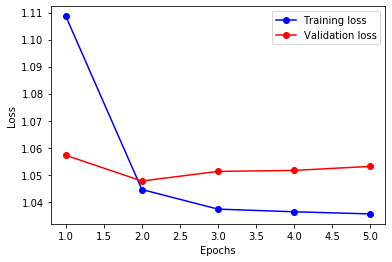

In [41]:
%pylab inline

epoch_range = range(1, epochs+1)

plt.plot(epoch_range, history.history['loss'], 'bo-', label='Training loss')
plt.plot(epoch_range, history.history['val_loss'], 'ro-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

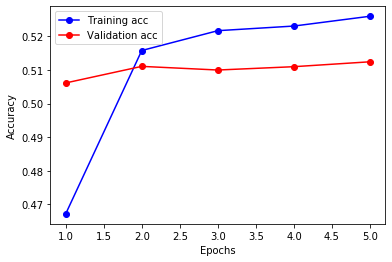

In [42]:
#plt.plot(epoch_range, history.history['mae'], 'bo-', label='Training MAE')
#plt.plot(epoch_range, history.history['val_mae'], 'ro-', label='Validation MAE')
plt.plot(epoch_range, history.history['acc'], 'bo-', label='Training acc')
plt.plot(epoch_range, history.history['val_acc'], 'ro-', label='Validation acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
model.evaluate(test_sequences, test_labels, verbose=2)

53766/1 - 3s - loss: 1.2087 - acc: 0.5121


[1.0562523056193174, 0.51205224]

In [44]:
predictions = model.predict(test_sequences)

In [53]:
test_labels[0].argmax()

1

In [54]:
for i in range(len(test_labels)):
    #print(f'\nPrediction: {predictions[i]}\nActual: {test_labels[i]}')
    print(predictions[i].argmax() == test_labels[i].argmax())

False
True
False
False
True
False
True
False
False
True
True
True
False
True
False
False
True
True
True
False
True
True
False
False
True
False
False
True
True
False
True
True
False
False
False
True
True
True
True
False
True
True
False
True
False
True
True
False
True
True
True
True
True
True
True
False
False
False
True
True
False
True
False
False
False
True
False
False
False
False
True
True
True
True
True
False
True
True
True
True
True
True
False
True
False
True
False
True
True
False
True
False
True
False
False
False
True
False
False
True
False
False
True
True
False
True
False
False
True
True
True
False
True
False
False
True
False
False
True
False
True
True
True
True
True
False
True
True
False
False
False
True
False
False
True
False
True
True
False
True
False
True
True
True
False
True
True
True
True
True
True
True
True
False
False
False
True
True
True
False
False
True
True
False
True
False
True
True
True
True
False
True
True
False
False
False
True
False
False
False
True
True
True
True
F

True
False
False
True
True
False
True
False
True
True
True
False
False
True
True
True
False
True
True
True
True
False
True
True
False
False
True
True
False
False
True
False
False
True
False
True
False
False
True
True
True
False
True
False
True
False
False
True
False
True
False
True
True
True
True
False
False
True
False
False
False
False
False
True
False
True
True
False
True
False
True
True
False
True
True
False
False
True
False
False
False
True
True
False
False
False
True
False
True
False
False
True
False
True
False
True
True
True
False
True
False
True
False
True
False
False
False
True
True
True
False
False
False
False
True
False
True
True
True
True
False
True
True
True
True
False
True
True
True
False
True
True
False
False
True
False
False
False
False
True
True
True
True
False
True
False
False
False
False
False
True
False
False
False
False
False
False
False
True
True
False
True
True
True
True
True
False
True
True
True
True
False
False
True
True
True
False
False
True
True
True
False
Tru

False
False
False
False
True
False
False
True
True
True
False
True
True
False
False
True
True
False
True
False
True
False
True
False
False
False
True
False
False
True
True
False
True
False
True
True
False
True
False
True
False
True
False
True
False
True
True
False
False
True
False
False
False
False
False
True
False
False
False
True
False
True
True
True
False
True
False
True
True
True
True
False
True
True
False
True
False
True
False
False
True
True
True
True
True
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
True
False
False
False
True
False
True
True
True
False
False
True
False
False
True
True
True
False
True
False
False
True
True
False
False
False
False
True
False
False
True
True
False
False
True
False
False
True
False
True
True
False
False
False
True
False
False
False
True
True
False
True
True
False
True
True
False
True
True
False
False
False
False
False
True
False
False
True
False
False
True
True
False
True
True
True
False
False
True
True
Fa

False
True
True
True
True
False
True
True
True
True
False
True
True
False
False
True
False
False
False
True
False
False
False
False
True
False
False
True
True
True
True
True
False
True
True
False
True
True
True
True
True
False
True
True
True
False
True
False
True
True
False
True
False
False
False
False
False
True
False
False
False
False
False
False
False
True
False
True
False
True
True
True
True
False
False
False
False
False
True
True
True
False
False
False
False
False
False
False
True
False
True
True
True
True
True
False
True
True
True
True
False
True
True
True
True
False
False
True
True
True
False
True
True
False
False
True
False
True
True
False
False
True
True
True
True
False
False
True
True
False
True
False
True
False
False
True
True
True
True
True
False
True
True
True
False
True
True
True
False
False
True
True
False
True
False
True
False
True
True
True
True
False
True
True
True
False
True
False
False
False
True
True
True
True
True
True
False
False
False
True
True
True
False
True
F

True
False
True
True
False
False
True
True
False
False
False
False
False
False
True
True
True
False
False
True
True
False
True
False
True
True
True
True
False
True
True
False
False
True
False
False
False
True
True
True
False
False
True
True
True
True
True
True
True
False
False
True
False
True
True
True
False
True
False
False
True
False
True
True
False
True
True
True
False
False
True
True
False
False
True
True
True
False
False
True
False
False
False
False
False
False
True
False
True
True
True
True
True
False
False
False
False
True
True
False
True
False
False
False
False
True
False
True
True
False
True
True
False
True
True
True
False
True
True
False
False
False
False
False
False
True
False
True
True
False
True
False
False
True
False
False
True
False
True
False
True
True
False
True
False
True
True
False
True
False
False
False
True
False
False
False
False
True
False
True
False
False
False
True
True
False
True
False
True
True
False
False
True
True
True
True
False
False
False
True
True
True


True
False
True
False
False
True
True
True
True
True
False
True
True
True
True
False
True
False
False
True
True
False
False
True
True
False
False
True
True
True
True
True
True
True
True
True
True
False
True
False
False
False
False
False
True
False
True
True
True
False
False
True
True
False
True
False
True
True
True
False
False
False
False
False
True
False
False
False
True
False
True
True
True
True
True
True
False
False
False
True
False
False
False
True
True
True
False
False
False
False
False
False
False
True
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
True
True
False
False
True
False
False
False
False
False
False
True
False
True
True
False
True
False
False
False
False
False
False
True
True
True
False
True
True
False
True
True
False
True
True
False
False
True
False
True
False
False
True
True
False
False
False
False
True
False
True
True
True
True
True
False
False
True
False
True
False
True
True
False
False
True
True
True
True
True
True
True
Tru

True
False
True
True
True
False
False
True
False
True
True
False
True
True
True
True
False
True
True
False
True
True
False
True
False
False
False
True
False
True
False
False
True
True
True
False
True
False
True
True
False
False
False
True
False
True
True
True
True
True
False
True
False
False
True
False
True
True
True
False
True
True
False
False
True
True
True
False
True
True
False
False
True
True
True
False
False
True
True
False
True
True
True
False
False
False
True
True
True
True
True
True
True
False
True
True
False
False
False
False
True
False
False
False
True
False
True
True
True
False
False
False
False
True
True
True
False
True
False
False
True
True
False
True
True
True
False
True
False
True
True
False
True
False
False
True
False
True
True
False
False
False
True
False
True
False
True
True
True
True
False
False
True
False
True
False
False
False
True
True
False
True
False
False
True
True
False
True
False
False
True
False
True
True
False
True
False
True
False
False
True
False
False
Tr

True
True
False
False
True
True
True
False
False
True
False
False
False
True
True
True
True
True
True
False
False
True
True
True
False
False
False
True
False
True
False
False
True
False
False
True
True
False
False
True
False
True
False
True
True
False
False
True
False
True
True
False
False
False
True
False
False
False
True
False
False
True
False
False
False
True
False
False
True
False
False
False
True
True
False
True
True
True
True
True
False
False
False
True
True
False
False
False
True
True
False
True
True
True
False
True
False
True
True
True
True
True
False
True
False
False
True
True
False
True
True
True
True
True
False
True
True
False
False
False
True
True
True
False
False
True
True
False
True
False
True
True
True
True
True
False
True
True
False
False
False
False
True
False
True
True
False
True
False
True
True
True
False
True
True
False
False
False
True
False
True
False
False
False
False
True
False
False
False
True
True
True
True
False
True
False
False
True
False
True
True
False
Tru

False
False
False
False
False
False
False
False
True
True
False
True
False
True
False
True
False
False
True
True
False
True
True
True
True
True
True
False
False
False
False
True
False
False
False
False
True
True
True
True
True
True
True
False
False
True
False
True
True
True
True
False
False
False
True
False
True
False
False
True
False
False
False
True
False
True
False
False
True
False
True
True
False
False
False
False
True
False
True
True
False
False
True
True
True
True
False
True
True
True
False
False
False
False
False
False
False
True
True
False
False
True
False
True
True
False
True
True
False
True
False
False
False
False
True
True
False
True
True
False
False
False
False
False
False
False
False
True
False
False
True
False
False
True
False
False
True
False
True
True
True
False
True
False
True
True
True
False
True
True
False
True
True
False
True
False
False
True
True
True
False
False
True
False
False
False
True
False
False
True
False
False
True
True
False
False
False
True
True
False
Fa

False
False
False
True
False
True
False
False
False
False
False
False
True
False
False
True
False
False
True
True
True
True
False
False
False
True
True
False
True
False
False
True
True
True
True
True
True
True
True
True
True
False
False
True
True
False
False
False
False
True
True
False
True
True
False
True
True
True
True
False
False
False
False
True
True
False
True
False
False
False
True
True
False
True
True
False
True
False
True
True
False
False
True
False
False
False
True
True
False
True
False
True
True
True
True
True
False
True
True
False
False
True
True
False
False
False
True
True
False
False
False
False
True
True
False
True
True
False
False
True
True
True
True
False
True
False
True
True
True
False
False
True
True
False
False
True
False
False
True
True
False
True
True
False
True
False
False
False
False
True
True
True
False
False
True
True
True
True
True
True
True
False
True
False
False
True
False
False
False
False
False
True
True
False
True
True
True
False
False
True
False
False
Fa

True
False
False
False
True
False
True
False
False
False
True
True
False
True
True
True
False
False
False
True
False
False
True
True
True
True
False
True
False
True
True
True
False
False
False
False
True
False
False
True
True
False
False
False
False
False
False
True
True
True
True
False
False
True
False
True
False
True
False
False
False
True
False
True
False
False
False
True
False
False
False
True
False
True
False
True
False
True
True
False
True
False
False
False
True
True
False
False
True
False
False
False
True
True
True
True
False
True
False
False
True
False
True
False
False
True
False
False
False
True
True
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
True
True
False
False
True
False
True
True
False
True
True
True
False
True
False
False
True
False
False
False
True
False
False
False
False
True
False
True
True
True
False
False
True
False
True
False
True
False
True
False
True
False
False
True
False
True
False
True
True
True
True
False
True
True

True
True
False
True
False
False
False
False
True
False
True
True
False
False
False
False
True
False
True
False
True
False
False
True
False
True
True
True
False
True
True
False
True
True
False
False
False
False
True
False
True
True
True
True
True
True
True
True
False
True
True
False
False
True
False
True
False
True
True
True
True
True
True
True
True
False
True
False
True
False
True
True
True
True
False
False
False
False
False
False
True
True
True
False
False
False
True
False
True
True
False
False
True
True
True
True
False
True
True
True
True
True
True
False
False
True
False
False
True
True
True
False
True
True
False
False
False
True
True
True
False
True
False
True
True
False
True
False
True
False
True
True
True
False
True
True
False
False
False
True
False
False
False
False
False
True
True
True
True
True
True
False
False
False
True
True
False
False
False
True
True
True
True
True
True
True
True
False
True
False
False
False
False
False
True
True
False
False
True
False
False
False
False
Fa

False
False
True
True
True
True
False
False
False
True
True
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
True
False
False
True
True
True
True
True
False
False
True
False
True
True
False
True
False
True
True
False
False
False
True
False
False
True
True
True
True
False
True
True
True
False
False
True
True
False
True
True
False
True
True
True
False
True
False
False
False
True
False
False
True
False
True
False
False
True
False
False
False
True
False
False
True
True
True
True
False
True
True
True
True
False
True
False
True
False
False
True
True
True
False
True
True
False
True
True
False
False
True
False
False
False
True
True
False
False
True
True
False
False
True
True
True
False
True
False
False
False
False
False
False
False
True
True
True
False
False
False
False
False
True
True
False
False
True
True
False
False
True
False
True
True
True
True
True
True
True
False
True
True
True
True
False
True
True
True
True
False
False
False


True
False
False
True
True
False
False
True
True
True
False
False
False
False
False
True
False
False
False
False
False
True
False
True
True
False
False
False
False
False
True
True
False
False
False
False
True
True
False
True
False
False
True
False
False
False
False
False
False
False
True
True
True
True
True
False
True
True
True
True
False
False
True
False
False
True
True
True
True
False
True
False
False
True
False
True
False
True
False
True
False
True
False
False
False
True
False
True
True
True
False
True
False
True
False
True
False
True
False
True
False
False
False
True
False
True
False
False
True
True
False
False
False
True
True
True
True
False
False
True
True
False
False
True
False
False
False
False
False
True
True
False
False
False
False
True
False
False
True
False
True
True
True
True
False
False
True
True
True
False
True
True
True
True
False
False
True
False
False
True
False
True
False
True
False
False
False
False
False
True
False
False
True
False
True
False
True
True
False
True
F

True
True
False
False
False
False
True
True
False
True
True
False
False
True
False
False
True
False
False
True
False
True
True
False
True
True
False
False
True
True
True
True
True
True
False
False
True
False
False
False
False
True
False
False
True
False
False
False
False
False
True
False
True
True
True
True
False
True
True
True
False
False
True
False
True
True
True
True
True
False
False
True
False
True
False
False
False
False
False
True
False
False
True
False
True
True
False
False
True
True
False
False
False
True
True
False
False
False
True
False
False
True
False
True
False
False
True
False
False
False
True
False
False
True
False
False
True
False
True
False
True
True
True
False
False
True
True
True
False
False
True
True
True
True
False
True
True
True
True
False
True
False
False
True
True
True
False
True
True
False
False
True
True
True
True
True
False
False
False
True
True
False
True
False
False
False
True
False
True
False
True
True
True
True
True
False
True
False
True
False
False
True


False
True
False
False
True
True
True
True
True
False
False
True
False
False
True
True
True
False
True
True
False
True
False
True
True
False
True
False
False
True
True
False
True
False
False
True
False
False
False
False
False
True
True
True
False
False
True
False
False
True
False
True
True
False
False
True
True
True
True
True
True
False
False
True
True
False
True
False
False
True
True
False
True
False
False
True
True
False
True
True
True
False
True
True
True
True
False
False
False
True
True
False
False
True
False
False
True
True
True
False
False
True
True
False
True
False
False
True
False
False
True
False
False
False
True
False
False
False
False
False
False
True
True
True
False
True
False
False
True
False
False
True
False
True
True
True
True
False
False
False
True
True
True
False
True
True
False
True
True
False
True
True
False
True
False
False
False
True
False
False
True
True
True
False
True
False
True
True
True
False
True
True
True
True
True
False
False
False
True
False
False
False
Fa

False
False
False
True
True
True
False
False
False
True
True
False
True
False
True
True
True
False
True
False
False
False
True
True
True
True
True
False
False
False
True
True
True
True
False
False
False
False
False
False
False
True
True
True
False
False
True
True
False
False
True
False
True
True
False
True
False
True
False
True
True
False
False
False
True
True
False
False
True
False
False
False
False
True
True
False
True
True
True
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
True
False
False
True
False
True
True
True
True
False
True
False
True
True
True
False
False
True
False
False
False
True
True
True
False
True
False
True
False
False
False
False
False
False
True
True
False
False
True
True
False
False
True
True
False
False
False
False
False
False
False
False
True
True
True
False
False
False
False
False
False
True
True
False
True
True
False
True
True
False
True
False
False
True
True
False
True
False
False
False
False
False
True
False
True
Fals

True
False
False
False
False
False
True
False
True
True
True
True
True
True
False
False
False
True
False
True
True
False
True
True
True
True
True
True
False
True
True
False
False
False
True
True
True
True
True
False
True
False
False
False
True
False
True
False
False
False
True
False
True
True
False
False
False
False
True
False
False
True
False
True
False
False
False
True
True
False
False
False
False
False
False
True
False
True
True
True
False
True
True
False
True
True
True
False
True
False
True
False
True
False
False
False
True
False
True
True
True
True
True
False
False
True
False
True
False
False
True
True
False
False
False
False
False
False
True
True
True
True
True
True
True
False
False
True
True
True
False
False
True
True
True
False
False
True
True
True
False
False
True
False
True
True
False
False
False
True
True
False
False
False
False
False
True
True
True
False
True
True
False
True
False
False
True
False
True
False
True
False
False
True
False
False
True
True
True
False
True
True
T

True
True
False
True
False
False
True
True
True
True
False
True
False
True
False
False
True
True
True
True
True
True
False
False
True
True
False
True
False
False
True
False
True
True
True
False
True
False
False
False
True
False
False
True
False
True
False
False
True
False
True
False
False
True
False
True
True
False
True
False
True
False
True
True
False
True
False
True
False
False
True
True
False
True
True
False
True
False
False
True
False
True
True
False
False
True
True
True
False
True
False
False
True
False
True
True
True
True
False
True
False
False
True
False
False
True
False
True
False
False
False
False
False
False
False
True
False
False
True
False
True
True
False
True
True
True
False
False
True
True
True
True
True
True
True
True
False
False
False
True
False
True
True
True
True
True
False
True
False
False
True
False
False
True
True
True
False
True
False
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True
Fa

True
True
False
True
True
False
False
False
True
False
True
True
True
True
True
False
True
False
True
False
True
True
True
True
True
False
False
True
False
False
True
False
True
False
True
False
False
True
False
True
True
True
True
False
False
False
False
False
True
False
False
True
False
True
False
False
True
True
False
True
False
True
False
False
True
True
True
True
True
False
True
True
False
True
True
False
True
True
False
True
True
True
True
False
False
True
True
True
False
True
False
True
False
False
True
True
True
False
False
False
True
True
True
True
False
False
True
True
True
False
True
False
False
False
False
True
True
False
False
False
True
True
False
True
False
True
True
True
False
True
True
True
False
False
False
True
False
False
False
False
True
False
True
True
True
False
True
False
True
True
True
True
True
True
True
False
False
False
False
True
False
False
True
True
True
False
False
False
True
True
True
False
True
False
False
False
False
False
False
True
False
True
False


False
False
True
True
False
True
True
True
True
True
True
True
False
False
False
False
False
True
True
False
True
False
True
True
False
True
False
False
True
True
False
False
True
True
False
True
True
True
False
True
True
True
True
True
True
True
False
False
False
True
False
False
True
False
True
True
True
False
True
False
False
False
False
False
False
True
True
False
True
True
True
False
False
True
False
True
False
True
True
False
True
False
True
True
True
False
False
False
True
True
True
False
False
False
True
False
False
True
True
True
True
True
False
False
True
True
True
True
True
True
False
True
True
False
True
False
False
False
True
False
True
True
False
False
False
False
False
True
True
True
False
True
False
False
False
True
True
True
False
True
False
True
True
True
True
True
True
True
False
True
False
False
False
False
True
False
False
False
True
True
True
False
False
True
True
True
True
False
False
False
False
False
False
True
False
True
True
True
True
True
False
False
False
F

True
True
False
False
False
True
True
True
True
False
True
True
False
True
True
True
False
False
False
False
False
True
True
True
True
True
False
True
True
False
False
False
True
False
False
False
True
True
True
True
False
False
False
False
True
False
False
True
False
False
True
True
True
False
False
True
True
False
False
True
True
False
False
False
True
False
True
True
False
False
True
True
True
False
False
False
False
False
True
False
False
True
False
False
True
True
False
True
True
True
True
False
False
True
True
True
True
True
False
False
False
True
True
True
False
True
True
True
True
True
False
False
False
True
True
True
True
True
True
False
True
False
False
False
False
False
False
False
True
True
True
False
True
False
True
True
True
False
False
False
True
True
False
False
False
True
False
False
False
True
True
True
False
False
False
True
False
False
True
False
True
True
False
False
True
True
False
False
True
True
True
False
False
False
True
False
False
False
False
True
False
Fals

False
False
True
True
True
False
False
False
True
True
False
False
True
False
True
False
True
True
False
False
False
True
False
True
False
True
True
False
True
False
True
True
False
False
True
False
False
True
False
True
False
False
False
False
False
False
False
True
True
False
True
False
True
False
False
True
False
True
False
False
True
False
False
True
False
True
True
True
False
False
True
True
True
True
False
False
False
True
True
False
True
True
False
False
False
False
True
True
True
True
False
False
True
False
False
True
True
True
False
True
True
False
True
True
True
True
False
True
False
True
False
False
False
False
True
True
False
True
False
True
True
True
False
True
True
True
False
False
True
True
True
True
False
True
False
False
True
True
True
False
True
False
True
False
False
True
True
False
True
False
False
True
True
False
True
False
True
False
False
False
False
True
True
False
False
True
True
False
False
True
False
False
False
False
True
False
True
True
True
True
False
True

True
False
False
True
False
True
False
False
False
False
True
True
False
True
False
False
False
True
True
True
False
True
True
False
False
False
True
False
False
False
False
True
True
True
False
True
False
True
True
True
True
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
True
False
True
True
False
False
False
True
True
True
True
False
True
True
True
False
False
True
True
False
True
False
True
True
False
False
False
False
True
True
False
False
False
True
False
False
False
True
True
False
False
True
False
False
True
True
False
False
True
True
True
True
False
False
True
False
True
True
False
True
False
True
True
False
True
False
False
True
True
False
False
True
False
True
True
False
True
False
True
False
True
True
False
False
True
True
False
True
False
True
False
True
False
True
True
False
True
True
False
True
False
True
True
False
False
True
False
True
True
True
False
False
True
True
False
True
False
False
False
True
False
True
False
True
True
Tr

True
True
False
True
False
True
True
True
False
False
False
False
True
False
True
False
False
False
False
False
True
False
False
False
False
False
True
False
False
True
False
False
True
True
False
False
True
False
False
False
True
True
False
False
False
False
True
False
True
True
False
False
False
True
False
True
True
True
True
True
False
True
True
False
False
False
True
True
False
False
True
False
True
False
False
False
True
True
True
False
True
False
False
True
True
False
False
False
False
True
False
False
True
True
False
False
False
True
True
True
True
True
True
False
True
False
False
True
True
True
False
True
False
False
True
False
True
True
True
False
False
False
False
False
True
True
False
True
True
True
False
False
True
True
False
False
False
False
False
True
False
True
False
False
False
True
True
False
True
True
False
False
True
True
True
False
True
False
True
False
True
True
True
True
False
True
False
False
True
False
False
True
False
True
True
False
True
False
False
False
Fal

True
False
True
False
True
True
True
True
True
False
True
False
False
True
True
True
False
False
True
True
True
False
True
True
False
False
True
True
True
True
True
True
True
True
False
True
False
False
False
False
False
False
False
True
False
True
False
True
True
False
False
False
True
True
True
True
False
False
False
False
True
True
False
False
False
True
True
False
True
True
False
False
True
False
False
False
True
False
False
True
True
True
False
True
False
True
False
True
False
False
True
True
True
False
False
False
False
True
False
True
False
True
False
False
False
True
True
True
False
False
True
False
True
False
False
False
True
True
False
False
False
False
True
False
True
False
False
True
False
True
True
False
False
True
True
True
True
True
False
False
False
False
True
True
True
True
False
True
False
True
False
False
True
True
True
False
True
True
False
True
True
True
True
False
False
True
False
False
True
False
False
True
True
False
False
True
True
False
False
False
True
False


True
True
False
True
False
False
True
True
False
False
True
True
True
False
True
False
True
True
True
True
True
True
True
False
True
False
True
True
True
False
False
False
False
False
False
False
True
True
True
False
True
True
True
False
True
False
True
True
False
True
True
False
True
False
False
True
True
True
True
True
True
False
True
False
True
False
True
True
False
True
True
False
True
False
False
True
True
True
False
False
True
True
True
False
False
True
True
False
False
True
False
True
True
True
False
False
True
False
False
True
False
True
False
False
True
False
False
True
True
True
True
False
False
False
False
True
False
False
False
False
True
True
False
False
False
False
True
True
True
False
True
False
True
False
True
False
True
True
False
True
False
True
False
True
False
False
False
True
False
True
False
True
False
False
False
True
True
False
True
True
True
False
True
True
False
True
True
True
False
True
False
False
False
True
False
False
True
True
False
False
True
False
False

False
True
False
False
False
True
True
True
False
False
False
False
True
False
False
True
True
True
True
False
True
True
True
True
False
False
False
True
True
True
True
True
True
False
True
False
True
True
False
True
True
False
False
False
False
False
False
False
True
False
False
True
False
False
True
False
False
True
False
False
False
True
True
True
True
False
False
False
True
False
True
False
True
True
False
False
False
False
True
True
True
True
False
False
False
True
False
False
False
True
True
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
True
False
False
True
False
False
False
True
True
True
True
False
True
False
True
False
True
True
False
True
False
True
False
False
True
True
False
True
False
False
True
True
True
False
True
True
True
False
True
True
False
False
False
False
False
True
False
True
True
True
True
False
False
True
False
True
True
True
False
True
True
True
True
True
True
True
True
False
False
True
True
True
False
Tr

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions > 0).T
print(cm)